# MNIST For ML Beginners

Implementation of the [tutorial](https://www.tensorflow.org/tutorials/mnist/beginners/) plus some code to evaluate single files at the end.

Type `make` on the command line to install dependencies and run the notebook or `make slides` to update the `index.html`.

![](simplenn.png)

# Designing the neural network

![](https://www.tensorflow.org/images/softmax-regression-scalargraph.png)

# as a matrix:

![](https://www.tensorflow.org/images/softmax-regression-vectorequation.png)

## Input

- 28x28 images = 784 bytes
- normalized as (1 - int(byte) / 255) aka floats
- any nymber of images

In TensorFlow:

In [1]:
import tensorflow as tf

x = tf.placeholder(tf.float32, [None, 784])

## Weights and bias

- 784 inputs, 10 outputs

In [2]:
W = tf.Variable(tf.zeros([784, 10]))  # One weights per arrow

In [3]:
b = tf.Variable(tf.zeros([10]))  # One bias per neuron

In [4]:
exp = tf.matmul(x, W) + b

$$\text{exp} = (\color{green}{W} * \color{purple}{x}) + \color{blue}{b}$$

![](https://www.tensorflow.org/images/softmax-regression-vectorequation.png)

**Softmax**: Normalize probabilities for exclusive classes (results add up to 100%).

$$\text{softmax}(x)_i = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$$

In [5]:
y = tf.nn.softmax(exp)

# Training

Minimizing the difference between what we have and what we want.

## Evaluating a single result (cross-entropy)

$$ H_{y'}(y) = -\sum_i y'_i \log(y_i) $$

We use this function because:
- it's value corralates with how similar y and y' are
- it can be efficiently calculated for big vectors

In [6]:
y_ = tf.placeholder(tf.float32, [None, 10])  # y', expected result
cross_entropy = tf.reduce_mean(
    -tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

## Optimize based on our evaluation function

Find the minimal cross-entropy by finding good values for weights (W) and biases (b)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Gradient_descent.svg/250px-Gradient_descent.svg.png)



In [7]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(
    cross_entropy)

## Running what we designed

## Getting the test and training data sets
![](https://www.tensorflow.org/images/MNIST.png)

In [8]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)

In [10]:
for i in range(1000):  # Randomly pick 1000 batches of 100 images
    batch_xs, batch_ys = mnist.train.next_batch(100)
    session.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [11]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(session.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9197


## Using the neural network

In [12]:
import numpy as np
import operator

def judge_file(filename, comp=None):
    with open(filename, 'rb') as f:
        pixels = []
        while True:
            try:
                pixels.append(f.read(1)[0])
            except IndexError:
                break

    result = session.run(y, feed_dict={x: [np.asfarray([1 - (pixel / 255) for pixel in pixels])]})

    d, p = max(enumerate(result[0]), key=operator.itemgetter(1))
    if d == comp:
        print("{}: {}, {:.4}%".format(filename, d, p * 100))
    return max(enumerate(result[0]), key=operator.itemgetter(1))


![](single_files/Untitled.png)

In [13]:
judge_file('single_files/Untitled.data')

(5, 0.8180598)

In [14]:
results = dict(enumerate([judge_file('single_files/test{}.data'.format(n), n) for n in range(10)]))
results

single_files/test0.data: 0, 99.73%
single_files/test2.data: 2, 99.92%
single_files/test3.data: 3, 100.0%
single_files/test4.data: 4, 98.88%
single_files/test5.data: 5, 80.34%


{0: (0, 0.99731904),
 1: (8, 0.78213757),
 2: (2, 0.9991979),
 3: (3, 0.99999475),
 4: (4, 0.98876089),
 5: (5, 0.80339414),
 6: (5, 0.99238622),
 7: (3, 0.82642066),
 8: (3, 0.95853442),
 9: (8, 0.45517373)}

# Fork me: https://github.com/zvyn/yatt

(yet another TensorFlow tutorial)

Slides at: https://zvyn.github.io/yatt/

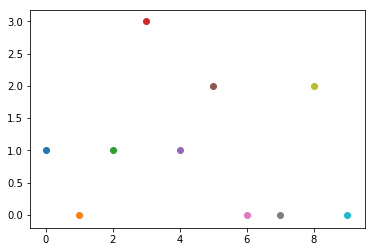

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_counts():
    counts = {k: 0 for k in range(10)}
    for v in results.values():
        counts[v[0]] += 1
    values, labels = [], []
    for x, y in counts.items():
        plt.scatter(x, y)
plot_counts()